In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1340 non-null   int64  
 1   age            1335 non-null   float64
 2   gender         1340 non-null   object 
 3   bmi            1340 non-null   float64
 4   bloodpressure  1340 non-null   int64  
 5   diabetic       1340 non-null   object 
 6   children       1340 non-null   int64  
 7   smoker         1340 non-null   object 
 8   region         1337 non-null   object 
 9   claim          1340 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 104.8+ KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

Id               0
age              0
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           0
claim            0
dtype: int64

In [7]:
df.dropna(inplace=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bloodpressure'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'claim'}>, <Axes: >]], dtype=object)

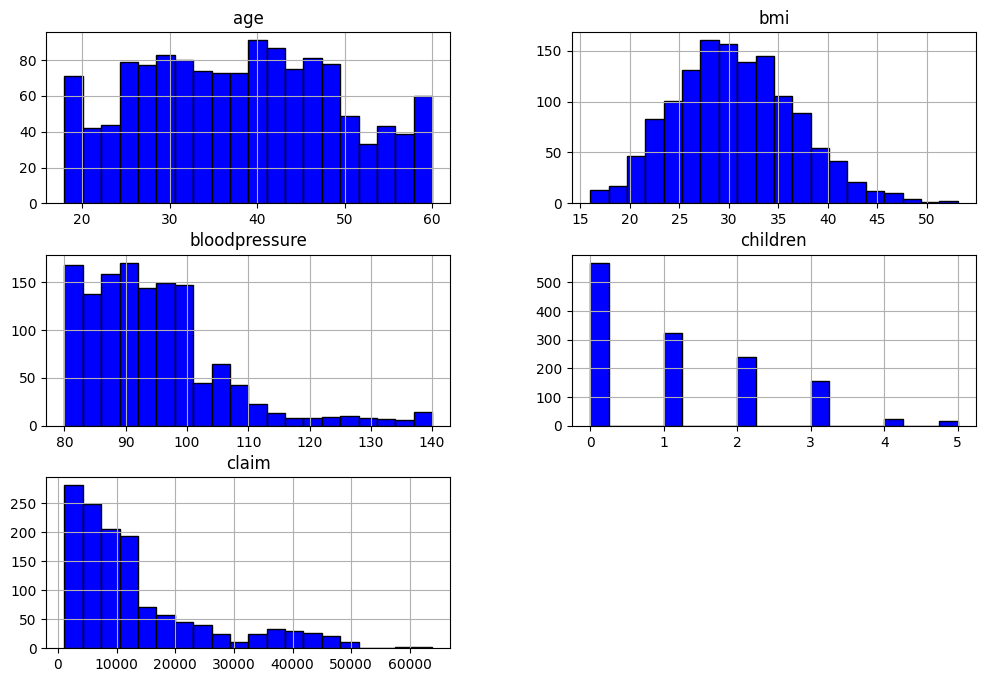

In [9]:
numerical_cols=['age','bmi','bloodpressure','children','claim']
df[numerical_cols].hist(bins=20,figsize=(12,8),color='blue',edgecolor='black')

C:\Users\ragha\AppData\Local\Temp\ipykernel_18664\229262671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\ragha\AppData\Local\Temp\ipykernel_18664\229262671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\ragha\AppData\Local\Temp\ipykernel_18664\229262671.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
C:\Users\ragha\AppData\Local\Temp\ipykernel_18664\229262671.py:5: FutureWarning: 

Passing `palette` without 

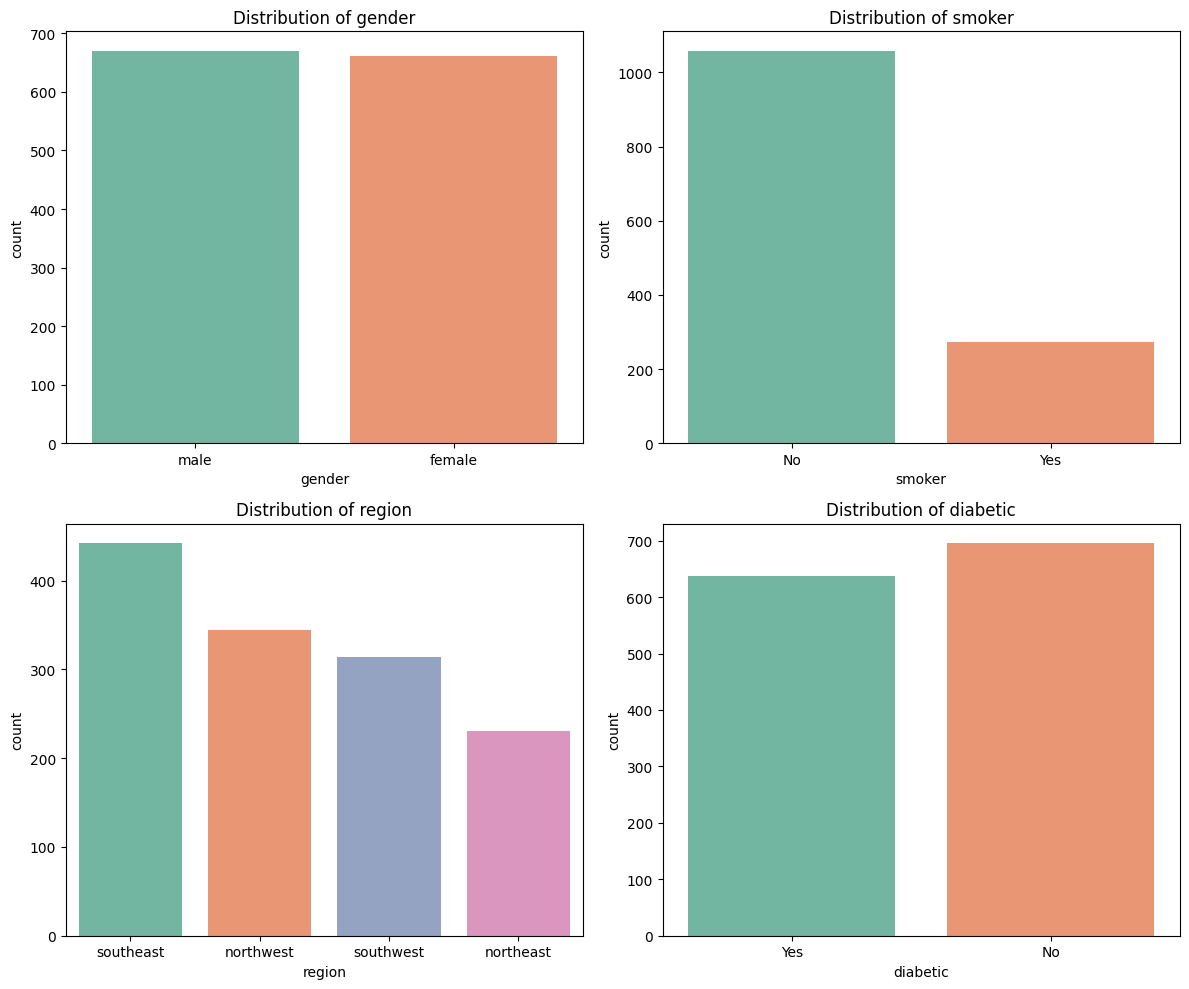

In [10]:
cat_cols=['gender','smoker','region','diabetic']
plt.figure(figsize=(12,10))
for i, col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

In [11]:
df.groupby(['gender','smoker'])['claim'].mean().round(2
)

gender  smoker
female  No         8762.30
        Yes       30679.00
male    No         8169.25
        Yes       33042.01
Name: claim, dtype: float64

<Axes: xlabel='gender', ylabel='claim'>

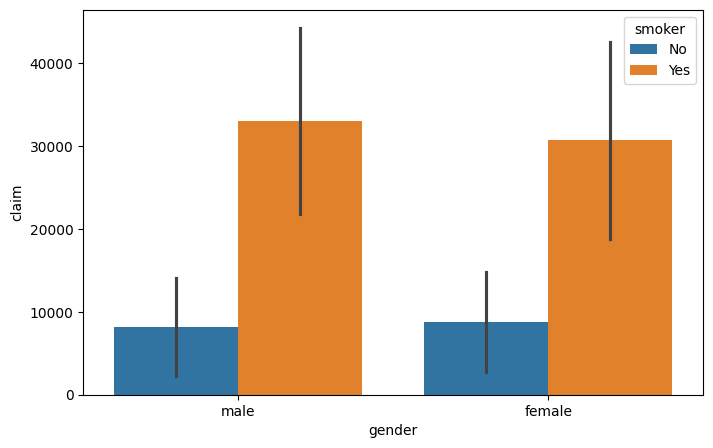

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='gender', y='claim', hue='smoker', estimator='mean',errorbar='sd')

In [13]:
pivot_region_diabetic=df.groupby(['region','diabetic'])['claim'].mean().unstack()

In [14]:
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.861455,16818.302231
northwest,11442.831842,12224.958000
southeast,13578.717200,12574.093226
southwest,13069.907824,12313.739167


<Axes: xlabel='region'>

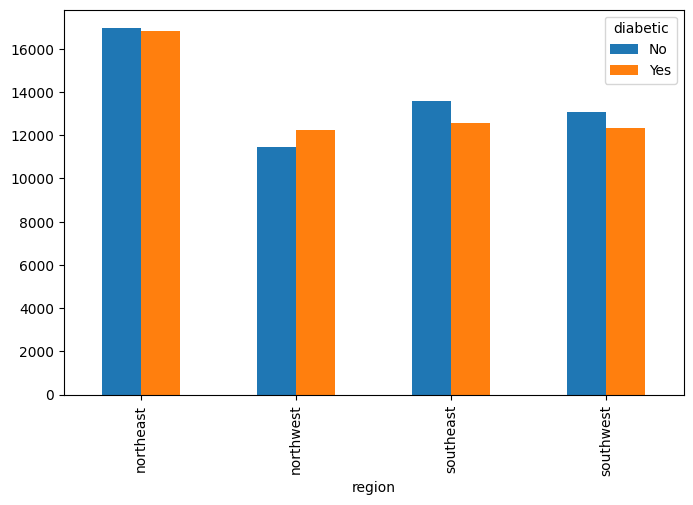

In [15]:
pivot_region_diabetic.plot(kind='bar', figsize=(8,5))

In [16]:
pivot_table=df.pivot_table(values='claim', index='region', columns='smoker', aggfunc='mean').round(2)
pivot_table

smoker,No,Yes
region,,
northeast,11666.11,29673.54
northwest,8076.20,30192.00
southeast,7444.14,34845.00
southwest,8294.75,32269.06


In [18]:
pivot_table=pd.pivot_table(df, values='claim', index='children', columns='diabetic', aggfunc='mean').round(2)

In [20]:
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


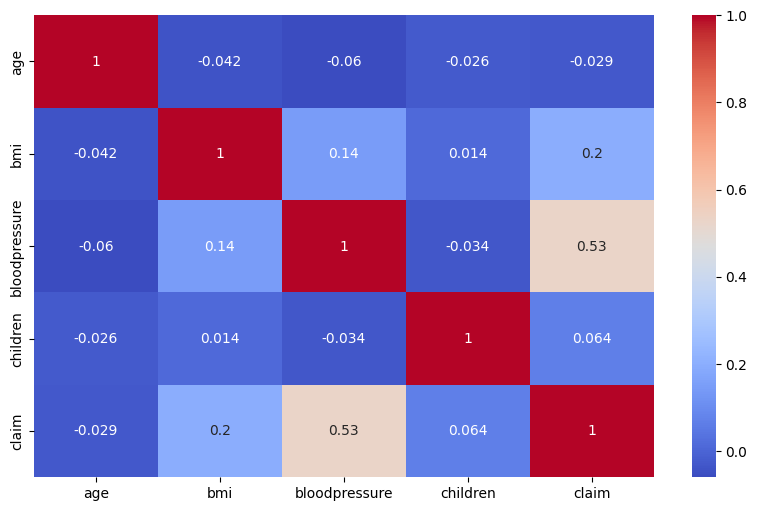

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

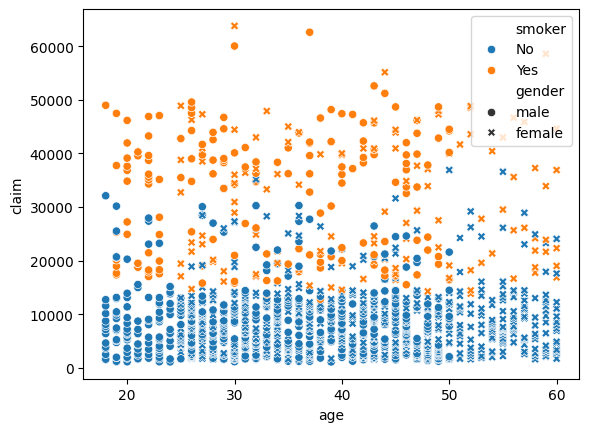

In [23]:
sns.scatterplot(data=df, x='age', y='claim', hue='smoker', style='gender')
plt.show()

In [24]:
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 100], labels=['0-18', '19-30', '31-45', '46-60', '60+'])

In [25]:
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'] )

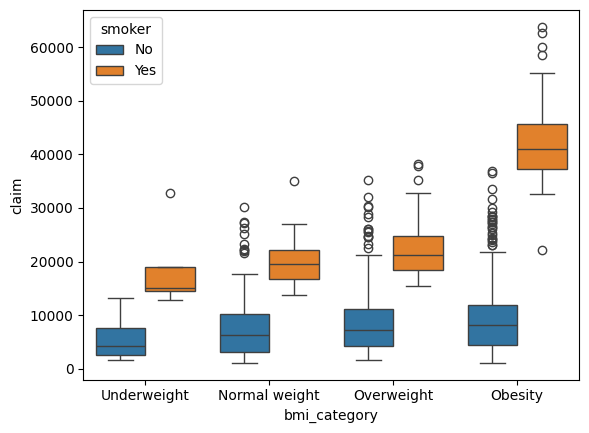

In [26]:
sns.boxplot(data=df, x='bmi_category', y='claim', hue='smoker')
plt.show()

In [28]:
region_stats=df.groupby('region').agg(
    smoker_rate=('smoker',lambda x: (x=='yes').mean()),
    mean_claim=('claim','mean')
).reset_index()

In [29]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,0.0,16889.044719
1,northwest,0.0,11794.221855
2,southeast,0.0,13085.496833
3,southwest,0.0,12723.129841


<Axes: xlabel='region', ylabel='mean_claim'>

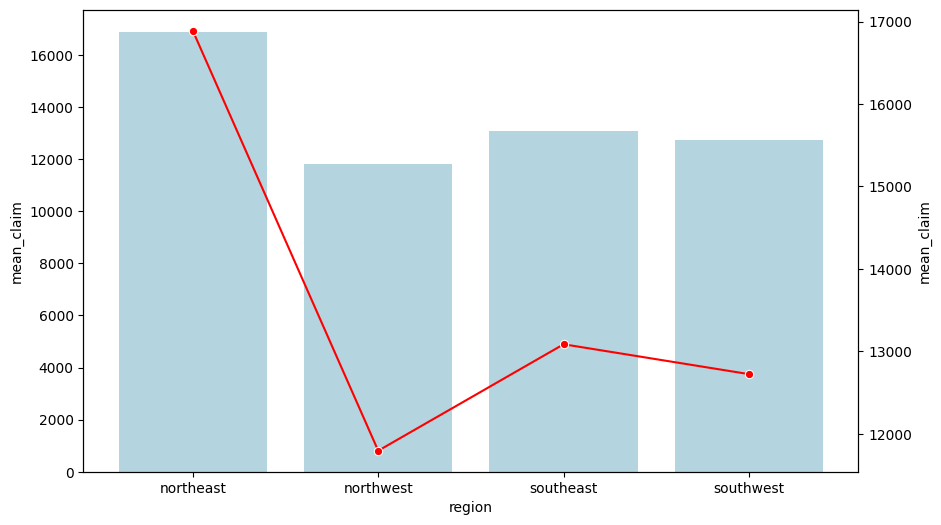

In [30]:
fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot(data=region_stats, x='region', y='mean_claim', ax=ax1, color='lightblue')
ax2=ax1.twinx()
sns.lineplot(data=region_stats, x='region', y='mean_claim', ax=ax2, color='red', marker='o')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import joblib


In [32]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [33]:
X=df[["age",'gender','bmi','children','smoker','bloodpressure','diabetic']]
y=df['claim']

In [34]:
cat_cols=['gender','smoker','diabetic']
label_encoders={}

In [36]:
for col in cat_cols:
    le=LabelEncoder()
    X[col]=le.fit_transform(X[col])
    label_encoders[col]=le
    joblib.dump(le,f'label_encoder_{col}.pkl')

C:\Users\ragha\AppData\Local\Temp\ipykernel_18664\1440759038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=le.fit_transform(X[col])
C:\Users\ragha\AppData\Local\Temp\ipykernel_18664\1440759038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col]=le.fit_transform(X[col])
C:\Users\ragha\AppData\Local\Temp\ipykernel_18664\1440759038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
num_cols=['age','bmi','children','bloodpressure']
scaler=StandardScaler()

In [39]:
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [40]:
joblib.dump(scaler,'standard_scaler.pkl')

['standard_scaler.pkl']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
!pip install xgboost
from xgboost import XGBRegressor

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/72.0 MB 796.0 kB/s eta 0:01:30
   ---------------------------------------- 0.5/72.0 MB 796.0 kB/s eta 0:01:30
   ---------------------------------------- 0.5/72.0 MB 796.0 kB/s eta 0:01:30
   ---------------------------------------- 0.8/72.0 MB 535.9 kB/s eta 0:02:13
   ---------------------------------------- 0.8/72.0 MB 535.9 kB/s eta 0:02:13
    --------------------------------------- 1.0/72.0 MB 597.9 kB/s eta 0:01:59
    ------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\ragha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
def evaluation_model(model,X_train,X_test,y_train,y_test):
    y_pred=model.predict(X_test)
    r2=r2_score(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    return {'R2':r2,'MAE':mae,'RMSE':rmse}

In [46]:
results={}

In [48]:
lr=LinearRegression()
lr.fit(X_train,y_train)
results['Linear Regression']=evaluation_model(lr,X_train,X_test,y_train,y_test)
print("Linear Regression is trained")

best_poly_model=None
best_poly_score=-np.inf
for degree in [2,3]:
    poly=PolynomialFeatures(degree=degree)
    X_train_poly=poly.fit_transform(X_train)
    X_test_poly=poly.transform(X_test)
    
    poly_lr=LinearRegression()
    poly_lr.fit(X_train_poly,y_train)
    
    score=poly_lr.score(X_test_poly,y_test)
    
    if score>best_poly_score:
        best_poly_score=score
        best_poly_model=(degree,poly,poly_lr)

degree,poly,poly_lr=best_poly_model
results[f'Polynomial Regression (degree={degree})']=evaluation_model(poly_lr,poly.fit_transform(X_train),poly.transform(X_test),y_train,y_test)
print(f"Polynomial Regression of degree {degree} is trained")
rf=RandomForestRegressor()
rf_params={
    'n_estimators':[100,200],
    'max_depth':[None,10,20],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}
rf_grid=GridSearchCV(rf,rf_params,cv=3,n_jobs=-1,scoring='r2',verbose=0)
rf_grid.fit(X_train,y_train)
best_rf=rf_grid.best_estimator_
results['Random Forest']=evaluation_model(best_rf,X_train,X_test,y_train,y_test)
print("Random Forest Regressor is trained,best parameters:",rf_grid.best_params_)


svr=SVR()
svr_params={
    'kernel':['linear','rbf','poly'],
    'C':[1,10,50],
    'epsilon':[0.1,0.2,0.5],
    'degree':[2,3]
}
svr_grid=GridSearchCV(svr,svr_params,cv=3,n_jobs=-1,scoring='r2',verbose=0)
svr_grid.fit(X_train,y_train)
best_svr=svr_grid.best_estimator_
results['SVR']=evaluation_model(best_svr,X_train,X_test,y_train,y_test)
print("Support Vector Regressor is trained,best parameters:",svr_grid.best_params_)


xgb=XGBRegressor(objective='reg:squarederror',random_state=42)
xgb_params={
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05,0.1],
    'max_depth':[3,5,7],
    'subsample':[0.8,1],
    
}
xgb_grid=GridSearchCV(xgb,xgb_params,cv=3,n_jobs=-1,scoring='r2',verbose=0)
xgb_grid.fit(X_train,y_train)
best_xgb=xgb_grid.best_estimator_
results['XGBoost']=evaluation_model(best_xgb,X_train,X_test,y_train,y_test)
print("XGBoost Regressor is trained,best parameters:",xgb_grid.best_params_)


Linear Regression is trained
Polynomial Regression of degree 2 is trained
Random Forest Regressor is trained,best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Support Vector Regressor is trained,best parameters: {'C': 50, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost Regressor is trained,best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [49]:
results

{'Linear Regression': {'R2': 0.7186402865210724,
  'MAE': 5034.26319889741,
  'RMSE': np.float64(6368.137982018985)},
 'Polynomial Regression (degree=2)': {'R2': 0.7757814325424961,
  'MAE': 4426.321815178741,
  'RMSE': np.float64(5684.82755425174)},
 'Random Forest': {'R2': 0.8203519509870763,
  'MAE': 3899.780894185694,
  'RMSE': np.float64(5088.534940613662)},
 'SVR': {'R2': 0.4979929465562679,
  'MAE': 5916.907409876852,
  'RMSE': np.float64(8506.21622300923)},
 'XGBoost': {'R2': 0.8346775699014983,
  'MAE': 3800.8936133544007,
  'RMSE': np.float64(4881.433739906377)}}

In [50]:
results_df=pd.DataFrame(results).T.sort_values(by='R2',ascending=False)
results_df

,R2,MAE,RMSE
XGBoost,0.834678,3800.893613,4881.433740
Random Forest,0.820352,3899.780894,5088.534941
Polynomial Regression (degree=2),0.775781,4426.321815,5684.827554
Linear Regression,0.718640,5034.263199,6368.137982
SVR,0.497993,5916.907410,8506.216223


In [52]:
models={
    'LinearRegression':lr,
    'PolynomialRegression':poly_lr,
    'RandomForest':best_rf,
    'SVR':best_svr,
    'XGBoost':best_xgb
    
}

In [54]:
best_r2=results_df["R2"].max()

In [55]:
best_r2

np.float64(0.8346775699014983)

In [57]:
top_model=results_df[results_df["R2"]==best_r2]

In [58]:
top_model

,R2,MAE,RMSE
XGBoost,0.834678,3800.893613,4881.43374


In [59]:
best_model=models[top_model.index[0]]


In [60]:
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [62]:
joblib.dump(best_model,'best_model.pkl')
print(f"Best model selected:{top_model.index[0]}")

Best model selected:XGBoost
